# File structure for project
- Project/Script/'Scripts(all ipnyb files)'
- Project/'All Mouse subjects'/'Sessions(.nwb files)
- eg. Project/M440959/sub-440959_ses-20190219T121506_behavior+ecephys+ogen.nwb

# Reading The Data
- Using pynwb

In [3]:
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import Position, SpatialSeries
from pynwb.epoch import TimeIntervals
from pynwb.file import Subject
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count
import ast
import pickle

In [12]:
%pip install nwbwidgets


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/73.8 kB ? eta -:--:--
   ---------------------------------------- 73.8/73.8 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/271.6 kB ? eta -:--:--
   ---------------------------------------- 271.6/271.6 kB 8.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.2 MB ? eta -:--:--
   - -------------------------------------- 0.6/15.2 MB 12.9 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/15.2 MB 13.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.2 MB 10.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.8/15.2 MB 10.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.4/15.2 MB 10.8 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/15.2 MB 11.1 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/15.2 MB 11.1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yapf 0.40.2 requires importlib-metadata>=6.6.0, but you have importlib-metadata 4.13.0 which is incompatible.


# Exploring functionalies of nwb module

In [14]:
#!pip install nwbwidgets
from nwbwidgets import nwb2widget

io = NWBHDF5IO("C:\\Users\\Smit3\\Downloads/sub-440959_ses-20190219T121506_behavior+ecephys+ogen.nwb", mode="r")
nwbfile = io.read()

nwb2widget(nwbfile)

#Suppose to give overall structure of nwb file but encountering unexpected error.

C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.1 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.2.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


[datetime.datetime(2023, 4, 25, 12, 50, 30, 357581, tzinfo=tzoffset(None, -18000))]


In [5]:
nwbfile.subject

subject pynwb.file.Subject at 0x1651595355760
Fields:
  age__reference: birth
  date_of_birth: 2018-10-09 00:00:00-05:00
  description: SC011
  sex: M
  species: Mus musculus
  subject_id: 440959

In [6]:
nwbfile.fields

{'session_description': '',
 'identifier': 'SC011_20190219_121506_s1',
 'session_start_time': datetime.datetime(2019, 2, 19, 12, 15, 6, tzinfo=tzoffset(None, -21600)),
 'timestamps_reference_time': datetime.datetime(2019, 2, 19, 12, 15, 6, tzinfo=tzoffset(None, -21600)),
 'file_create_date': [datetime.datetime(2023, 8, 7, 11, 38, 10, 172917, tzinfo=tzoffset(None, -18000))],
 'experimenter': ('susu',),
 'related_publications': ('',),
 'acquisition': {'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x1651578464480
  Fields:
    time_series: {
      delay_start_times <class 'pynwb.base.TimeSeries'>,
      delay_stop_times <class 'pynwb.base.TimeSeries'>,
      go_start_times <class 'pynwb.base.TimeSeries'>,
      go_stop_times <class 'pynwb.base.TimeSeries'>,
      left_lick_times <class 'pynwb.base.TimeSeries'>,
      photostim_start_times <class 'pynwb.base.TimeSeries'>,
      photostim_stop_times <class 'pynwb.base.TimeSeries'>,
      presample_start_times <clas

In [20]:
import glob

#Subject_name = 'M440959'

# Storing Each sessions NWB OBJECT into array to access it without opening it everytime
nwb_files = glob.glob("D:\\Mesoscale-Activity-Analysis\\NWBdata\\sub-480135\\*.nwb")
nwb_io = []

# Iterate over each Session path in nwb_files
for name in nwb_files:
    io = NWBHDF5IO(name, mode="r").read()
    nwb_io.append(io)

#Get Trials dataframe for Every session(Only Selected(useful) columns) 
trials_df = []
for i in range(len(nwb_files)):
    trials_df.append(nwb_io[i].trials.to_dataframe().drop(['trial','task','trial_uid', 'photostim_power','photostim_duration','auto_water', 'free_water'],axis=1))
    trials_df[i]['ses_no'] = i+1

C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.7.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.4.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [21]:
trials_df[0]

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no
id,,,,,,,,
0,0.0000,5.1165,N/A,1,right,no early,hit,1
1,6.9031,11.7713,N/A,1,right,no early,hit,1
2,15.5947,20.6671,N/A,1,right,no early,hit,1
3,22.8621,27.9466,N/A,1,right,no early,hit,1
4,30.5236,34.4181,N/A,1,left,no early,miss,1
...,...,...,...,...,...,...,...,...
535,3746.8896,3750.8645,N/A,1,left,no early,miss,1
536,3753.2631,3758.6214,N/A,1,right,no early,hit,1
537,3761.0350,3765.8459,2.511,1,left,no early,ignore,1


In [24]:
# Get Units dataframe for Every session
units_df = []
for i in range(len(nwb_files)):
    units_df.append(nwb_io[i].units.to_dataframe().query("unit_quality == 'good'").reset_index())
    units_df[i]['ses_no'] = i+1

In [25]:
units_df[0].columns

Index(['id', 'unit', 'sampling_rate', 'unit_quality', 'unit_posx', 'unit_posy',
       'unit_amp', 'unit_snr', 'isi_violation', 'avg_firing_rate',
       'drift_metric', 'left_trials_drift_metric', 'right_trials_drift_metric',
       'presence_ratio', 'amplitude_cutoff', 'isolation_distance', 'l_ratio',
       'd_prime', 'nn_hit_rate', 'nn_miss_rate', 'silhouette_score',
       'max_drift', 'cumulative_drift', 'duration', 'halfwidth', 'pt_ratio',
       'repolarization_slope', 'recovery_slope', 'spread', 'velocity_above',
       'velocity_below', 'classification', 'anno_name', 'is_good_trials',
       'spike_times', 'obs_intervals', 'electrodes', 'electrode_group',
       'waveform_mean', 'waveform_sd', 'ses_no'],
      dtype='object')

In [26]:
units_df[1]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,classification,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no
0,0,0,30000,good,27.0,80.0,148.773564,6.332715,0.009056,17.577800,...,good,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[1.861129501081598, 7.634363712376784, 11.7156...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[-1.048519736842105, -0.7638537449392712, -0.7...",[nan],2
1,1,1,30000,good,11.0,100.0,94.565545,3.945008,0.046421,1.319090,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[1.4755909629780004, 1.7207942732226886, 1.817...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[1.21453426124197, 1.47048982869379, 0.9560693...",[nan],2
2,4,4,30000,good,43.0,140.0,167.416057,6.111111,0.000000,0.053114,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[38.061735812416806, 38.07160261228527, 61.317...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[2.0196143617021276, 1.8949468085106382, 2.044...",[nan],2
3,5,5,30000,good,11.0,180.0,134.759760,5.747070,0.003571,37.220300,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.5405783403075943, 1.0433851281992308, 2.825...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.9360923423423424, 0.45045045045045046, 0.35...",[nan],2
4,7,7,30000,good,27.0,200.0,75.954426,3.158626,0.022055,7.318960,...,good,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[2.134566525814765, 2.3091022153799075, 19.418...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[0.6394182547642929, 0.5430353560682046, 0.437...",[nan],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,2311,457,29999,good,750.0,360.0,62.900207,2.447966,0.033202,5.447560,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.05627746000538858, 1.3382450859727164, 1.36...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[3.250991742227979, 3.4367852878076426, 4.0447...",[nan],2
1413,2313,459,29999,good,750.0,600.0,83.505796,2.126178,0.058263,5.892610,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.09691188030946485, 0.16504703625821993, 0.1...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[7.42522763534331, 7.04989826655244, 7.2816967...",[nan],2
1414,2314,460,29999,good,750.0,585.0,182.964642,4.031545,0.114851,3.061090,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.383419544389479, 1.0662378097780782, 1.3914...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[13.586667198196627, 13.98051728099645, 13.291...",[nan],2
1415,2318,464,29999,good,250.0,300.0,90.334403,1.704716,0.067163,7.352560,...,unlabelled,,"[True, True, True, True, True, True, True, Tru...","[0.08674494167718994, 0.10101198998739891, 0.1...","[[0.0, 2.9717], [4.7606, 8.6765], [10.5233, 14...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[2.808249676165803, 3.27154762386658, 3.602813...",[nan],2


In [27]:
units_df[1].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions']).value_counts()

electrodes
left ALM          488
right ALM         345
left Thalamus     300
right Thalamus    284
Name: count, dtype: int64

# Data Cleaning

In [29]:
pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = [],[],[],[],[],[],[],[]

for name in nwb_files:  
    with NWBHDF5IO(name, "r") as io:
        read_nwbfile = io.read()
        pre_start.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_start_times"].timestamps[:])
        pre_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["presample_stop_times"].timestamps[:])
        sample_start.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_start_times"].timestamps[:])
        sample_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["sample_stop_times"].timestamps[:])
        delay_start.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_start_times"].timestamps[:])
        delay_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["delay_stop_times"].timestamps[:])
        go_start.append(read_nwbfile.acquisition["BehavioralEvents"]["go_start_times"].timestamps[:])
        go_stop.append(read_nwbfile.acquisition["BehavioralEvents"]["go_stop_times"].timestamps[:])
print(len(pre_stop[1]),len(trials_df[1]))
      
      
def Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop):
#Matching the epochs start-stop timing and removing every other timing pairs
    for i in range(len(pre_start)):
        sample_start[i] = np.intersect1d(pre_stop[i], sample_start[i])
        sample_stop[i] = np.intersect1d(sample_stop[i], delay_start[i])
        delay_start[i] = np.intersect1d(delay_start[i], sample_stop[i])
        delay_stop[i] = np.intersect1d(delay_stop[i], go_start[i])
    return pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop

pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop = Clean_data(pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop)

C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.7.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\Smit3\anaconda3\Lib\site-packages\hdmf\spec\namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.4.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


500 500


In [30]:
#appending extra features (epoch start-stop timings into trials DataFrame)
for i in range(len(nwb_files)):
    trials_df[i] = trials_df[i].assign(pre_start = pre_start[i],
                             pre_stop = pre_stop[i],
                             sample_start = pre_stop[i],
                             sample_stop = sample_stop[i],
                             delay_start = delay_start[i],
                             delay_stop = delay_stop[i],
                             go_start = go_start[i],
                             go_stop = go_stop[i])
    units_df[i]['Region'] = units_df[i].electrodes.apply(lambda x: ast.literal_eval(x.location.values[0])['brain_regions'])
units_df[0]

,id,unit,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,...,anno_name,is_good_trials,spike_times,obs_intervals,electrodes,electrode_group,waveform_mean,waveform_sd,ses_no,Region
0,3,3,30000,good,11.0,20.0,94.812122,3.619639,0.225828,6.010540,...,,"[True, True, True, True, True, True, True, Tru...","[0.20442649102429566, 0.29156100067350943, 0.3...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[4.071469033232628, 4.099792296072508, 4.16115...",[nan],1,left ALM
1,5,5,30000,good,59.0,40.0,133.207918,4.923276,0.064677,5.659880,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[0.674566171243312, 0.7635673727595327, 0.7984...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[3.2040835889570554, 3.2160659509202456, 2.921...",[nan],1,left ALM
2,18,18,30000,good,11.0,140.0,194.815716,6.726510,1.000000,0.398842,...,,"[True, True, True, True, True, True, True, Tru...","[296.12857550661937, 410.39018326922417, 410.4...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[5.723326187335092, 5.812994722955144, 6.00779...",[nan],1,left ALM
3,21,21,30000,good,59.0,160.0,245.701521,8.687345,0.000000,1.025140,...,Olfactory areas,"[True, True, True, True, True, True, True, Tru...","[4.588419008256611, 7.0775943493070494, 9.8294...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[7.594327515400411, 7.558232802874744, 7.78442...",[nan],1,left ALM
4,22,22,30000,good,43.0,220.0,45.468750,2.194784,0.075979,11.349500,...,,"[True, True, True, True, True, True, True, Tru...","[0.08832492365313627, 0.09269164927059892, 0.2...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",l...,18194822541 1-384 pynwb.ecephys.ElectrodeGroup...,"[-0.4065688775510204, -0.30612244897959184, -0...",[nan],1,left ALM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2247,375,29999,good,32.0,105.0,77.156942,3.224451,0.000000,0.016057,...,,"[True, True, True, True, True, True, True, Tru...","[1.4800545157582965, 23.534199772935594, 68.58...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[3.0892794249487707, 4.56512951460041, 4.91533...",[nan],1,right Thalamus
1162,2248,376,29999,good,250.0,450.0,68.057489,2.301722,0.064176,6.408530,...,,"[True, True, True, True, True, True, True, Tru...","[0.10018427089591286, 0.2248209382600983, 3.06...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[2.689087415377952, 3.4355774552425564, 3.4755...",[nan],1,right Thalamus
1163,2250,378,29999,good,500.0,255.0,94.983607,3.112512,0.043860,1.533820,...,"Anteromedial nucleus, ventral part","[True, True, True, True, True, True, True, Tru...","[0.5239622736241527, 1.411119338408969, 2.3141...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[4.217359754774305, 4.495220419801312, 4.51641...",[nan],1,right Thalamus
1164,2251,379,29999,good,500.0,330.0,119.366399,3.848579,1.000000,0.346144,...,,"[True, True, True, True, True, True, True, Tru...","[18.783902316611968, 25.516586135104113, 33.24...","[[0.0, 5.1165], [6.9031, 11.7713], [15.5947, 2...",...,19011111142 1-96; 1281-1376; 2561-2656; 3841-3...,"[3.5236671702840043, 3.3520637674534575, 2.718...",[nan],1,right Thalamus


In [31]:
#Aggregating entire Data(Every sessions)
trial_result = pd.DataFrame()
unit_result = pd.DataFrame()
for i in range(len(nwb_files)):
    trial_result = pd.concat([trial_result, trials_df[i]])
    unit_result = pd.concat([unit_result, units_df[i]])
trial_result

,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
id,,,,,,,,,,,,,,,,
0,0.0000,5.1165,N/A,1,right,no early,hit,1,0.5000,0.5100,0.5100,1.9804,1.9804,3.1804,3.1804,3.2304
1,6.9031,11.7713,N/A,1,right,no early,hit,1,7.4031,7.4131,7.4131,8.7653,8.7653,9.9653,9.9653,10.0153
2,15.5947,20.6671,N/A,1,right,no early,hit,1,16.0947,16.1047,16.1047,17.4973,17.4973,18.6973,18.6973,18.7473
3,22.8621,27.9466,N/A,1,right,no early,hit,1,23.3621,23.3721,23.3721,24.8349,24.8349,26.0349,26.0349,26.0849
4,30.5236,34.4181,N/A,1,left,no early,miss,1,31.0236,31.0336,31.0336,32.4103,32.4103,33.6103,33.6103,33.6603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,4013.7673,4018.8648,N/A,1,right,no early,ignore,7,4014.2673,4014.2773,4014.2773,4015.8048,4015.8048,4017.0048,4017.0048,4017.0548
556,4021.7659,4026.6250,N/A,1,right,no early,ignore,7,4022.2659,4022.2759,4022.2759,4023.6250,4023.6250,4024.8250,4024.8250,4024.8750
557,4029.0527,4034.0710,N/A,1,right,no early,ignore,7,4029.5527,4029.5627,4029.5627,4031.0710,4031.0710,4032.2710,4032.2710,4032.3210


In [32]:
units_df_ag = unit_result
trials_df_ag = trial_result
units_df_ag["Region"].unique()

array(['left ALM', 'right ALM', 'left Thalamus', 'right Thalamus',
       'left Midbrain', 'left Striatum', 'right Striatum',
       'right Midbrain'], dtype=object)

# Queries

In [33]:
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left ALM'")

## Delay range [1.0,1.2]sec & Trial length <5.3sec

In [35]:
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

# Plotting with phases

In [36]:
bin_size = 1/200
trial_len = 5 #sec
data_points = trial_len/bin_size


'''
For both function

Input: Spike data(firing rate),sigma and other self explanatory inputs

Output: edges(time_vec), Gaussian smoothed Spike vector 

Process: Convert spike times into bins/vectors
- Use gaussian kernel to smooth the curves
'''
def plot_smooth_gauss(spike_data,sigma,color,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(data_points + 1)*bin_size - 1))
    freq = (hist/len(dataset))/bin_size
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    plt.plot(edges[1:],smooth_gauss,color=color)
    
def return_smooth_gauss(spike_data,sigma,dataset):
    hist, edges = np.histogram(np.hstack(spike_data), bins=(np.arange(data_points + 1)*bin_size - 1))
    freq = (hist/len(dataset))/bin_size
    width = np.diff(edges)
    smooth_gauss = []

    for i in edges[1:]:
        gauss = np.exp((- ( edges[1:] - i) ** 2) / ( 2 * (sigma**2) ) )
        gauss /=  sum(gauss)
        smooth_gauss.append(sum(gauss*freq))
    
    return freq,edges[1:],smooth_gauss

# Aligning spike time into trials

In [48]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

def get_firing_rate_graph(Trial_Data1,Trial_Data2,sigma):
    '''
    Input: Sets of DataFrame(left and right Trials) AND Sigma
    
    Output: Plots of Firing Rate for left and right trial
    
    Process: Turning Spike times into Trials
    - Aligning spike time to sample start time
    - Getting Spike time vectors
    - Smoothning it
    - plotting it
    '''
    after = 4.3
    before = -0.7
    spike_data = []
    
    for unit in units_Data.reset_index()['id'][:5]:
        unit_spike_times = units_Data["spike_times"][unit]
        trial_spikes_l = []
        trial_spikes_r = []
        for time in Trial_Data1['sample_start']:
            # Seperating Spike times into trials
            aligned_spikes1 = unit_spike_times - time
            aligned_spikes1 = aligned_spikes1[aligned_spikes1 < after ]
            aligned_spikes1 = aligned_spikes1[before < aligned_spikes1]
            trial_spikes_l.append(aligned_spikes1)
            
        for time in Trial_Data2['sample_start']:
            # Seperating Spike times into trials
            aligned_spikes = unit_spike_times - time
            aligned_spikes = aligned_spikes[aligned_spikes < after ]
            aligned_spikes = aligned_spikes[before < aligned_spikes]
            trial_spikes_r.append(aligned_spikes)            
            
        fig, axs = plt.subplots(1, 1, sharex="all")
        plt.xlabel("time (s)")
        plot_smooth_gauss(trial_spikes_l,sigma,'r',trials_Data_L)
        plot_smooth_gauss(trial_spikes_r,sigma,'b',trials_Data_R)
        axs.set_ylabel("Freq (Hz)")
        
        # Add vertical lines at specific x-axis positions for epoch plotting
        axs.axvline(0, color=[0.5, 0.5, 0.5])
        axs.axvline(0.65, color=[0.5, 0.5, 0.5])
        axs.axvline(1.85, color=[0.5, 0.5, 0.5])
        axs.axvline(3.35, color=[0.5, 0.5, 0.5])
        
        axs.text(0.1,0,'Sample',rotation=90)
        axs.text(0.75,0,'Delay',rotation=90)
        axs.text(1.95,0,'Go',rotation=90)
        axs.text(-0.4,0,'Pre-Sample',rotation=90)
        
# get_firing_rate_graph(trials_Data_L,trials_Data_R,0.05)

In [52]:
len(trials_Data_L),len(trials_Data_R),len(units_Data)

(714, 615, 2198)

In [54]:
def return_firing_rate_over_neurons(Trial_Data1,Trial_Data2,sigma):
    '''
    Input: Sets of DataFrame(left and right Trials) AND Sigma
    
    Output: left and right trial's firing rate(after smoothening) AND edges(time_vector)
    
    Process: Turning Spike times into Trials
    - Aligning spike time to sample start time
    - Getting Spike time vectors
    - Smoothning it
    - and returning(storing) it
    '''
    after = 4.3
    before = -0.7
    spike_data_l = []
    spike_data_r = []
    
    for session in range(1,len(nwb_files)+1):
        temp_data_l = Trial_Data1.query("ses_no == @session") 
        temp_data_r = Trial_Data2.query("ses_no == @session") 
        temp_unit = units_Data.query("ses_no == @session")
        for unit in temp_unit.reset_index()['index']:
            unit_spike_times = temp_unit["spike_times"][unit]
            trial_spikes_l = []
            trial_spikes_r = []
            i = 0
            for time in temp_data_l['sample_start']:
                # Seperating Spike times into trials
                aligned_spikes = unit_spike_times - time
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_l.append(aligned_spikes)

            frq_l,edges,smooth_l = return_smooth_gauss(trial_spikes_l,sigma,temp_data_l)    
            spike_data_l.append(smooth_l)

            for time in temp_data_r['sample_start']:
                # Seperating Spike times into trials
                aligned_spikes = unit_spike_times - time
                aligned_spikes = aligned_spikes[aligned_spikes < after ]
                aligned_spikes = aligned_spikes[before < aligned_spikes]
                trial_spikes_r.append(aligned_spikes)

            frq_r,edges,smooth_r = return_smooth_gauss(trial_spikes_r,sigma,temp_data_r)    
            spike_data_r.append(smooth_r)    
    return spike_data_l,spike_data_r,edges

## [REMOVE] the following comment if running for the first time.
l,r,edges = return_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

In [46]:
## [REMOVE] THE COMMENT OF THE ENTIRE CELL IF RUNNING FOR THE FIRST TIME

#%pip install pickle-mixin

# with open('440959_l.pkl', 'wb') as f:
#     pickle.dump(l, f)
# with open('440959_r.pkl', 'wb') as f:
#     pickle.dump(r, f)
# with open('440959_edges.pkl', 'wb') as f:
#     pickle.dump(edges, f)

In [47]:
# [COMMENT] THE ENTIRE CELL IF RUNNING FOR THE FIRST TIME
#Loading The data 

with open('440959_l.pkl', 'rb') as f:
    l = pickle.load(f)
with open('440959_r.pkl', 'rb') as f:
    r = pickle.load(f)
with open('440959_edges.pkl','rb') as f:
    edges = pickle.load(f)

# Coding Direction

In [74]:
offset = 1 #Because [-1,4]sec range so everything need to be at zero, so 1.25 sec is 2.25sec
Str_delay, Stp_delay = int((1.25+offset)/bin_size), int((1.85+offset)/bin_size)  ##1.25-1.85 (0.6sec)of Late Delay phase
Str_go , Stp_go = int((1.85+offset)/bin_size), int((2.45+offset)/bin_size)  ##1.85-2.45 (0.6sec)of Go phase

#Coding Direction formula
diff_cd = (-np.array(l)+np.array(r))

delay_avg_diff_lalm = diff_cd[:,Str_delay:Stp_delay+1].mean(axis=1)  
response_avg_diff_lalm = diff_cd[:,Str_go:Stp_go+1].mean(axis=1)

newly_l = np.array(l).T.dot(delay_avg_diff_lalm)
newly_r = np.array(r).T.dot(delay_avg_diff_lalm)

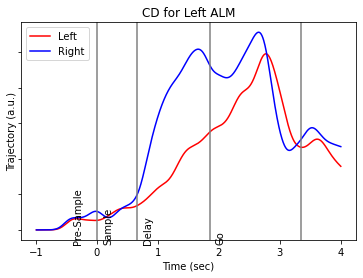

In [75]:
fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')

# Add vertical lines at specific x-axis positions for epoch plotting
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

axs.text(0.1,-35,'Sample',rotation=90)
axs.text(0.75,-35,'Delay',rotation=90)
axs.text(1.95,-35,'Go',rotation=90)
axs.text(-0.4,-35,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.set_xlabel("Time (sec)")
axs.set_title('CD for Left ALM')
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

# For Thalamus

In [32]:
units_df_ag['Region'].unique()

array(['left ALM', 'left Thalamus', 'left Midbrain'], dtype=object)

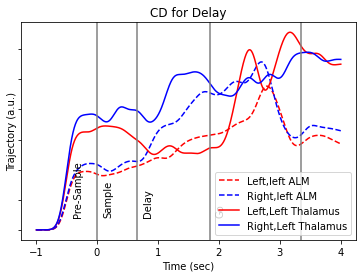

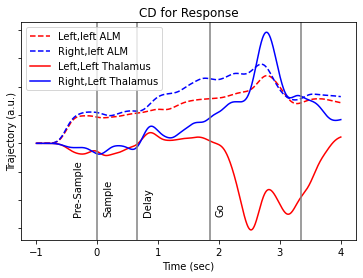

In [86]:
#Queries for thalamic units and related trials
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query(" Region == 'left Thalamus' and classification == 'good'")

trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']


# [REMOVE] the following comment if running for the first time
# st_l,st_r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)
# with open('440959_thal_l.pkl', 'wb') as f:
#     pickle.dump(st_l, f)
# with open('440959_thal_r.pkl', 'wb') as f:
#     pickle.dump(st_r, f)
    
with open('440959_thal_l.pkl', 'rb') as f:
    st_l = pickle.load(f)
with open('440959_thal_r.pkl', 'rb') as f:
    st_r = pickle.load(f)
    
    
#Coding direction equation for Delay and Response(Go) epoch
diff_cd = (-np.array(st_l)+np.array(st_r))
delay_avg_diff_ltha = diff_cd[:,Str_delay:Stp_delay+1].mean(axis=1)
response_avg_diff_ltha = diff_cd[:,Str_go:Stp_go+1].mean(axis=1)
newly_l_st = np.array(st_l).T.dot(delay_avg_diff_ltha)
newly_r_st = np.array(st_r).T.dot(delay_avg_diff_ltha)

fig, axs = plt.subplots(1, 1, sharex="all")
plt.title('CD for Delay')
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')

# Add vertical lines at specific x-axis positions for epoch plotting
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])


#To show text related to epochs on Graph
axs.text(0.1,50,'Sample',rotation=90)
axs.text(0.75,50,'Delay',rotation=90)
axs.text(1.95,50,'Go',rotation=90)
axs.text(-0.4,50,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.set_xlabel("Time (sec)")
axs.tick_params(labelleft = False)
axs.legend(['Left,left ALM','Right,left ALM','Left,Left Thalamus','Right,Left Thalamus'])
plt.show()


#Projection of vectors onto CD vector
newly_l_st = np.array(st_l).T.dot(response_avg_diff_ltha)
newly_r_st = np.array(st_r).T.dot(response_avg_diff_ltha)
newly_l = np.array(l).T.dot(response_avg_diff_lalm)
newly_r = np.array(r).T.dot(response_avg_diff_lalm)


fig, axs = plt.subplots(1, 1, sharex="all")
plt.title('CD for Response')
axs.plot(edges,newly_l,c='r',ls='--')
axs.plot(edges,newly_r,c='b',ls='--')
axs.plot(edges,newly_l_st,c='r')
axs.plot(edges,newly_r_st,'b')

# Add vertical lines at specific x-axis positions for epoch plotting
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])


#To show text related to epochs on Graph
axs.text(0.1,-500,'Sample',rotation=90)
axs.text(0.75,-500,'Delay',rotation=90)
axs.text(1.95,-500,'Go',rotation=90)
axs.text(-0.4,-500,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.set_xlabel("Time (sec)")
axs.tick_params(labelleft = False)
axs.legend(['Left,left ALM','Right,left ALM','Left,Left Thalamus','Right,Left Thalamus'])
plt.show()

In [87]:
from numpy import arccos, array
from numpy.linalg import norm
import math

'''
input: two vectors(here ,left and right firing rate vector's projection on CD)
output: Angle between those vector
'''
def angles(u, v): 
    return arccos(u.dot(v)/(norm(u)*norm(v)))
print(math.degrees(angles(delay_avg_diff_ltha, response_avg_diff_ltha)), math.degrees(angles(delay_avg_diff_lalm, response_avg_diff_lalm)))

74.9554561086059 48.45568408798914


In [102]:
len(r),len(trials_Data_L),len(trials_Data_R)

(2198, 714, 615)

# PCA

[0.6005827  0.17428595 0.12062133 0.05681448 0.02066677]


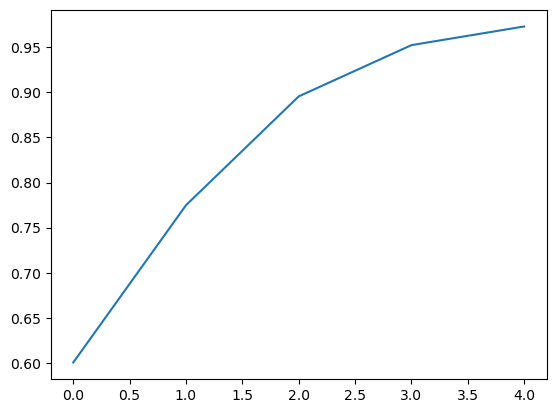

In [56]:
from sklearn.decomposition import PCA
%matplotlib inline
pca = PCA(n_components=5)
pca.fit(pd.DataFrame(l).T)
print(pca.explained_variance_ratio_[:5])
plt.plot(pca.explained_variance_ratio_.cumsum()[:10])
#plt.yticks(listOf_Yticks)

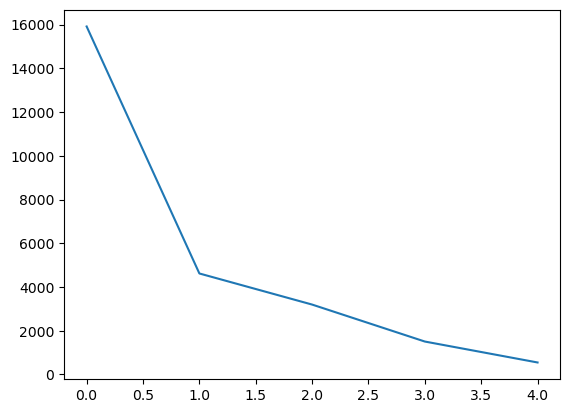

In [57]:
plt.plot(pca.explained_variance_)

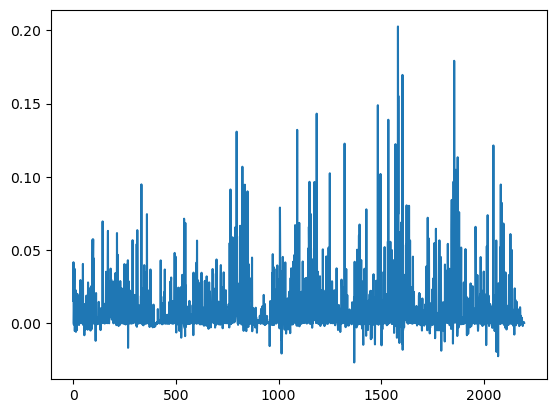

In [60]:
%matplotlib inline
pcacomp = np.array(pca.components_)
pcacomp.shape
plt.plot(pcacomp[0])

In [91]:
pca.get_covariance().shape

(236, 236)

(5, 1000)

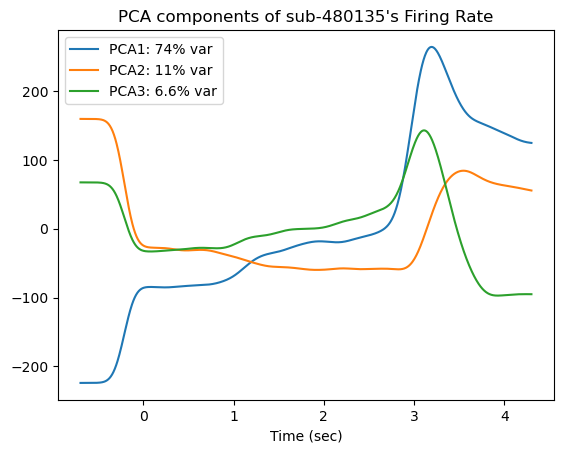

In [100]:
pca_comp = pca.fit_transform(pd.DataFrame(l).T)
plt.plot(edges+0.30,pca_comp.T[0])
plt.plot(edges+0.30,pca_comp.T[1])
plt.plot(edges+0.30,pca_comp.T[2])
plt.title('''PCA components of sub-480135's Firing Rate''')
plt.xlabel('Time (sec)')
plt.legend(["PCA1: 74% var", "PCA2: 11% var", "PCA3: 6.6% var"])

pca_comp.T.shape

(1000, 2198) (2198,)


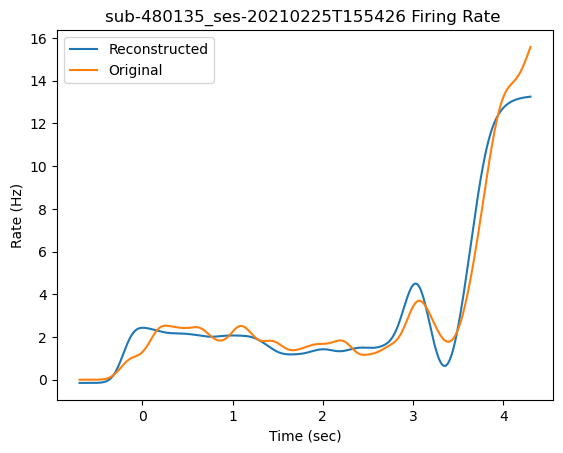

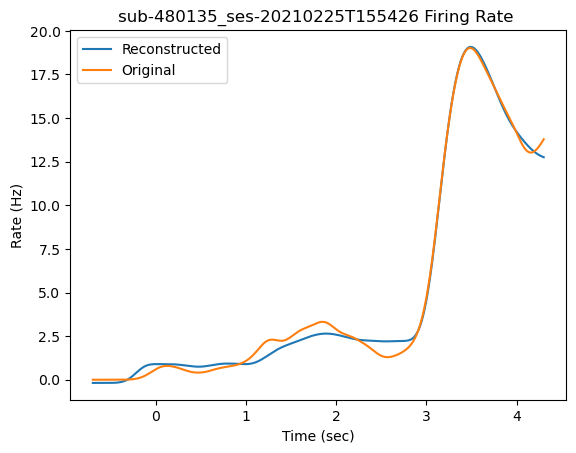

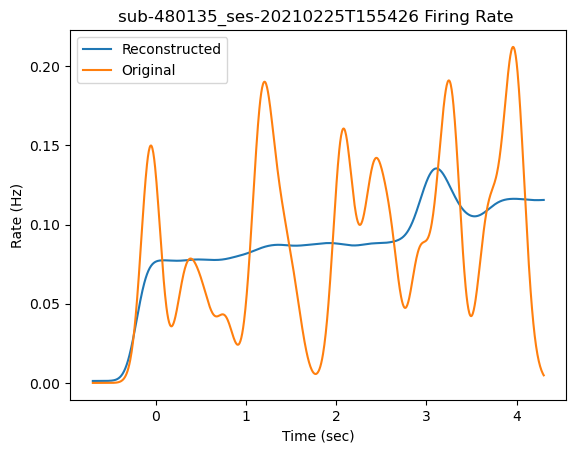

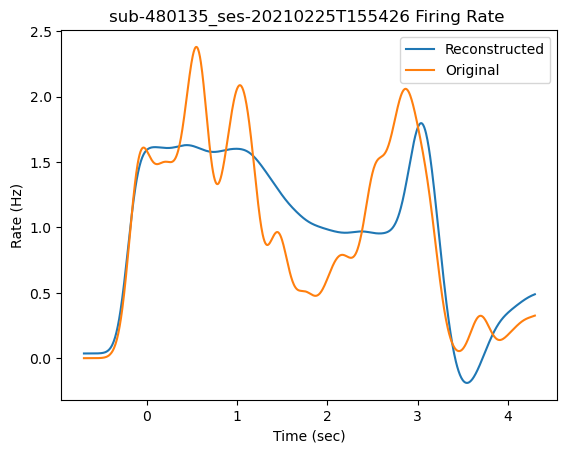

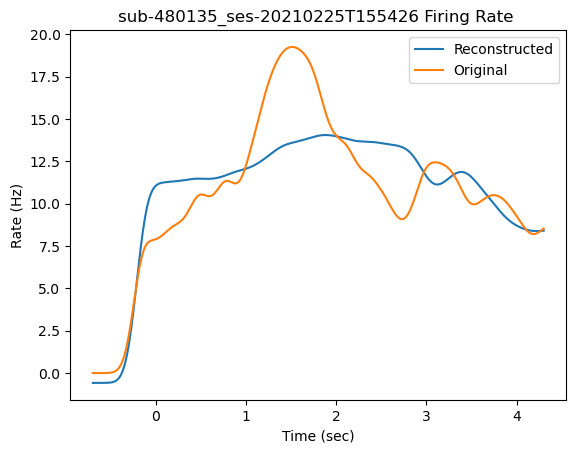

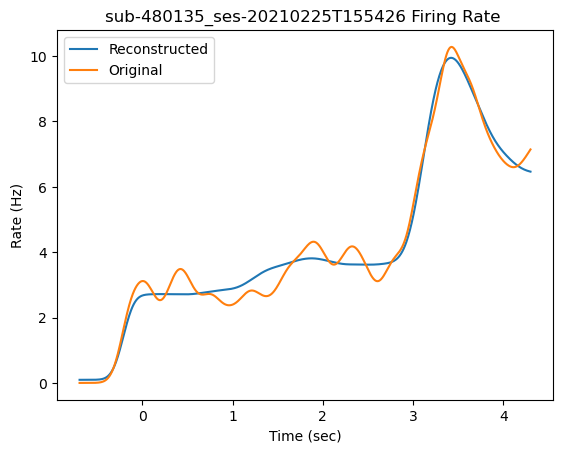

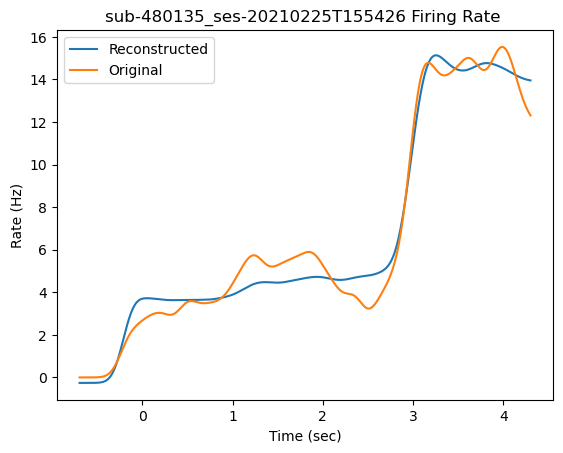

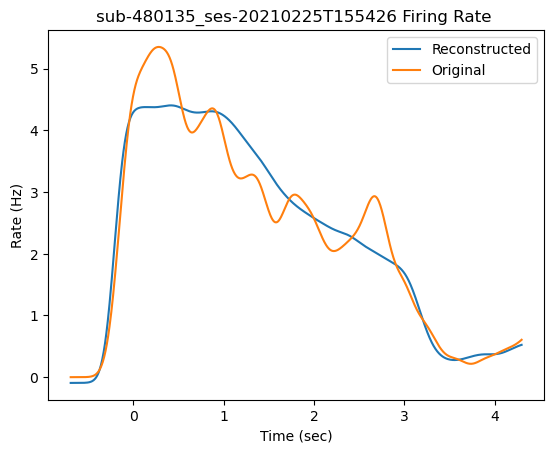

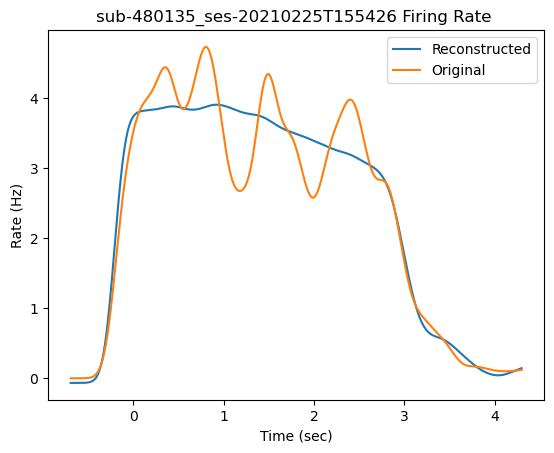

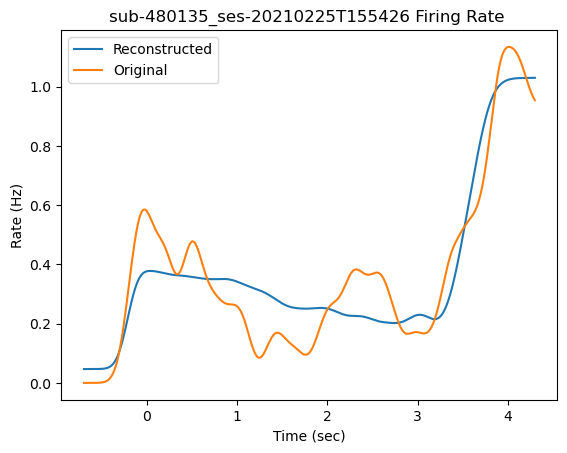

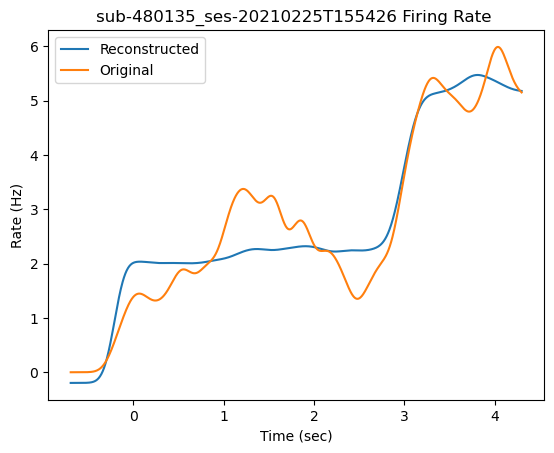

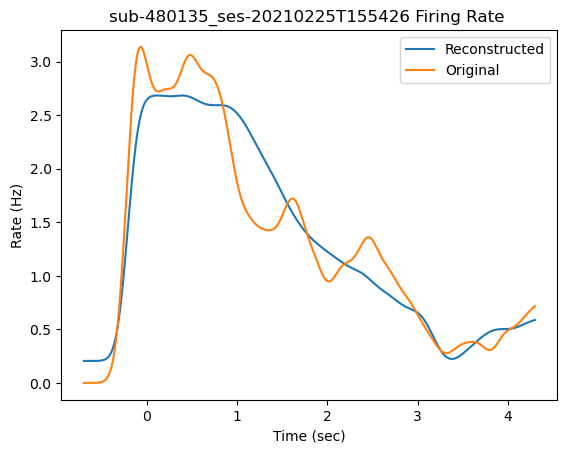

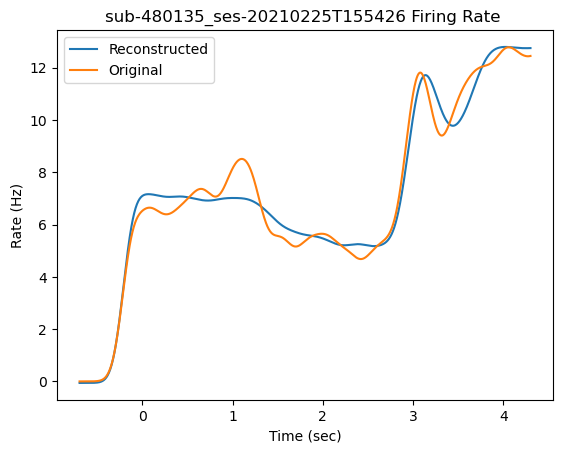

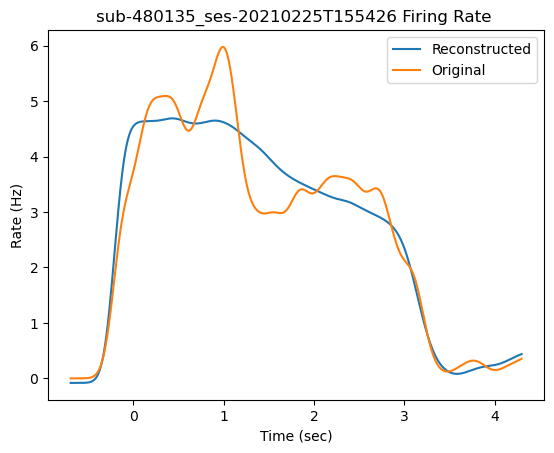

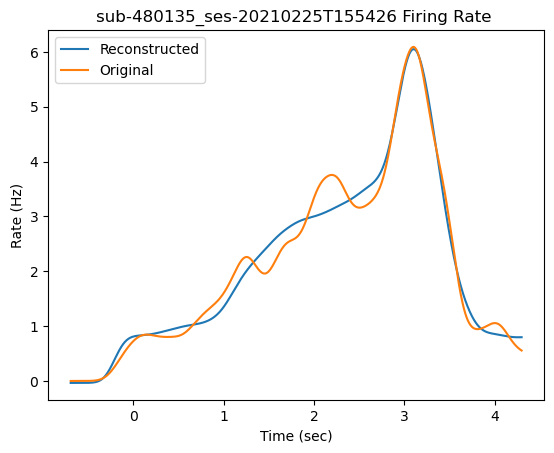

In [108]:
recon = pca_comp.dot(pcacomp) + pca.mean_
print(pca_comp.dot(pcacomp).shape ,  pca.mean_.shape)
for i in range(15):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.title('sub-480135_ses-20210225T155426 Firing Rate ')
    plt.plot(edges+0.30,recon.T[i])
    plt.plot(edges+0.30,l[i])
    plt.legend(['Reconstructed','Original'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Rate (Hz)')
    plt.show()

In [68]:
# [PCA FROM SCRATCH]

data_st_l = pd.DataFrame(l).T
X_meaned = data_st_l - np.mean(data_st_l , axis = 0)

cov_mat = np.cov(X_meaned , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 5
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

X_reduced.shape

(1000, 5)

In [69]:
eig_vals_total = sum(eigen_values)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalue]
print('Explained Variance : ',explained_variance[:5])

Explained Variance :  [60.058270352713315, 17.428595088429276, 12.062133418251197, 5.681447792429731, 2.0666765048884024]


In [80]:
(np.arange(0,1000)-140)/2

array([-70. , -69.5, -69. , -68.5, -68. , -67.5, -67. , -66.5, -66. ,
       -65.5, -65. , -64.5, -64. , -63.5, -63. , -62.5, -62. , -61.5,
       -61. , -60.5, -60. , -59.5, -59. , -58.5, -58. , -57.5, -57. ,
       -56.5, -56. , -55.5, -55. , -54.5, -54. , -53.5, -53. , -52.5,
       -52. , -51.5, -51. , -50.5, -50. , -49.5, -49. , -48.5, -48. ,
       -47.5, -47. , -46.5, -46. , -45.5, -45. , -44.5, -44. , -43.5,
       -43. , -42.5, -42. , -41.5, -41. , -40.5, -40. , -39.5, -39. ,
       -38.5, -38. , -37.5, -37. , -36.5, -36. , -35.5, -35. , -34.5,
       -34. , -33.5, -33. , -32.5, -32. , -31.5, -31. , -30.5, -30. ,
       -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5, -26. , -25.5,
       -25. , -24.5, -24. , -23.5, -23. , -22.5, -22. , -21.5, -21. ,
       -20.5, -20. , -19.5, -19. , -18.5, -18. , -17.5, -17. , -16.5,
       -16. , -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5, -12. ,
       -11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,
        -7. ,  -6.5,

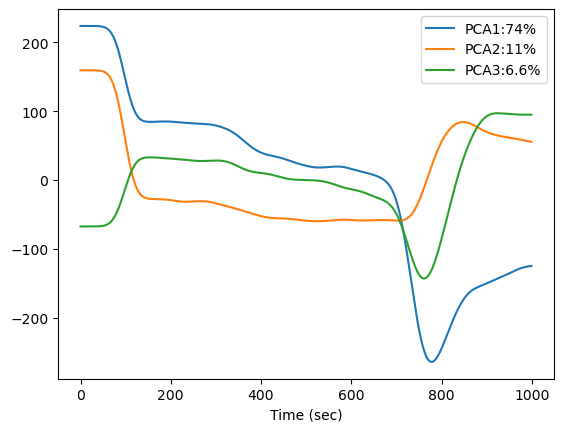

In [72]:
%matplotlib inline
plt.plot(X_reduced.T[0])
plt.plot(X_reduced.T[1])
plt.plot(X_reduced.T[2])
plt.xlabel('Time (sec)')
plt.legend(["PCA1:74%", "PCA2:11%", "PCA3:6.6%"])

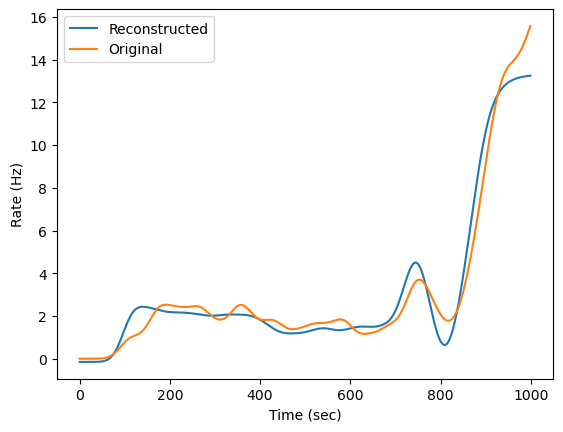

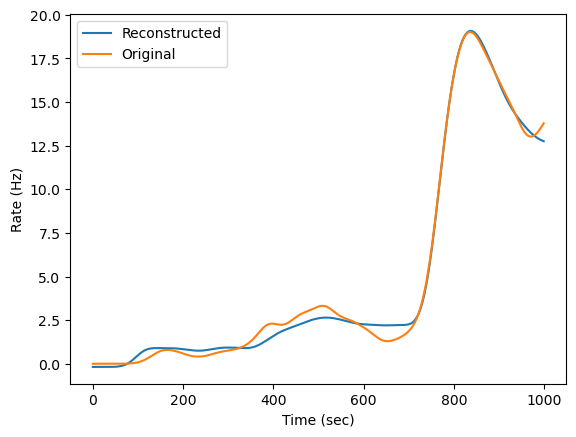

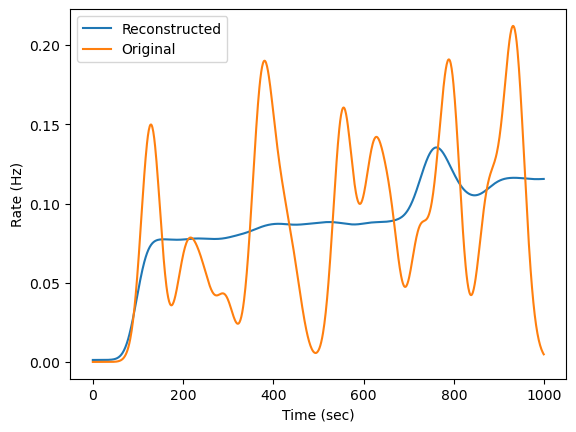

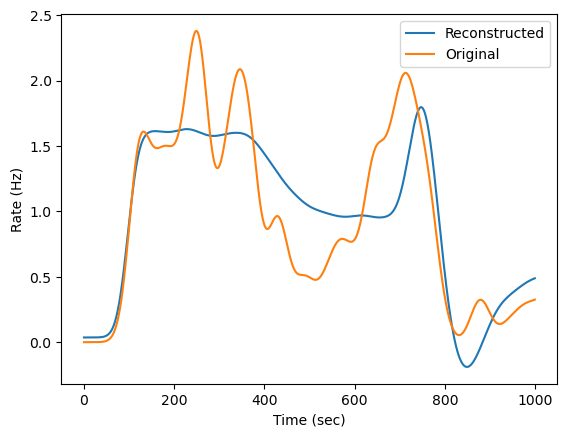

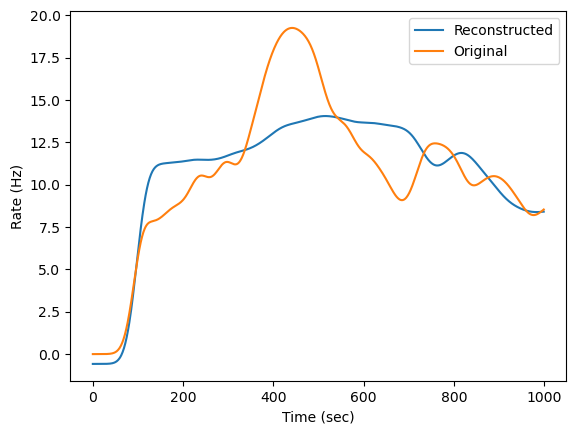

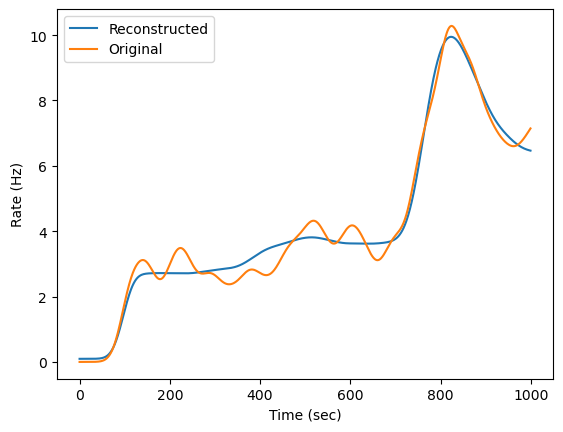

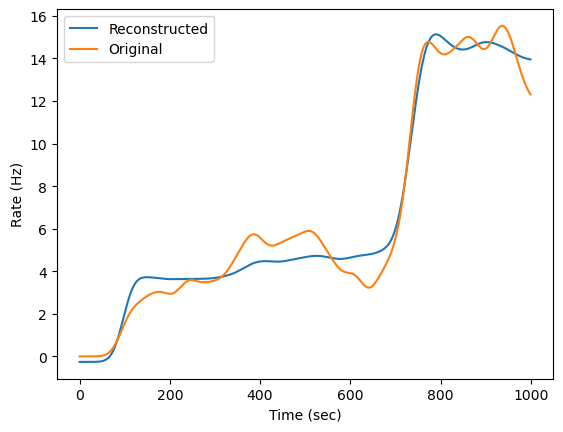

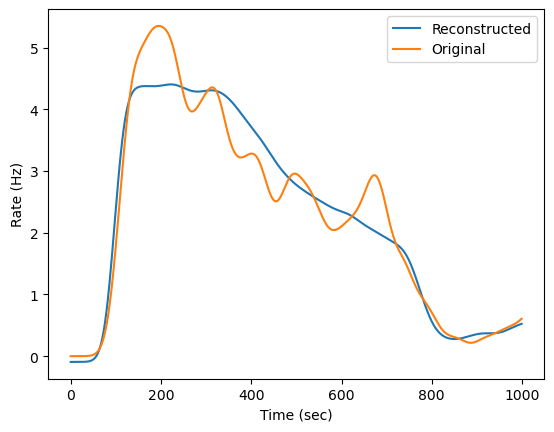

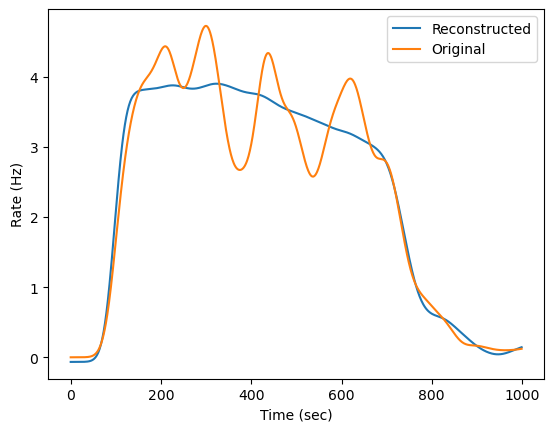

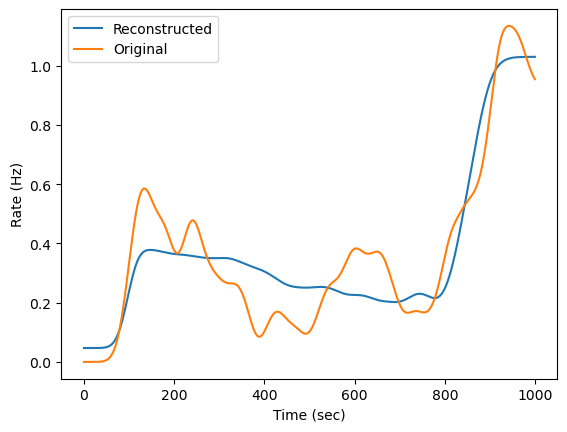

In [76]:
recon = X_reduced.dot(eigenvector_subset.T) #+ np.mean(data_st_l , axis = 0)
for i in range(10):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(recon.T[i] + np.mean(data_st_l , axis = 0)[i])
    plt.plot(l[i])
    plt.legend(['Reconstructed','Original'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Rate (Hz)')
    plt.show()

# Multiregional PCA(Left Trials)

In [102]:
#Queries on new data(Contains every region)
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query("classification == 'good'")
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']


# [REMOVE] THE COMMENT IF RUNNING FOR THE FIRST TIME

# l,r,edges = get_firing_rate_over_neurons(trials_Data_L,trials_Data_R,0.1)

# import pickle
# with open('440959_all_l.pkl', 'wb') as f:
#     pickle.dump(l, f)
# with open('440959_all_r.pkl', 'wb') as f:
#     pickle.dump(r, f)

In [104]:
# [COMMENT] THE CODE BELOW IF RUNNING FOR THE FIRST TIME
import pickle
with open('440959_all_l.pkl', 'rb') as f:
    l = pickle.load(f)
with open('440959_all_r.pkl', 'rb') as f:
    r = pickle.load(f)

# Coding Direction

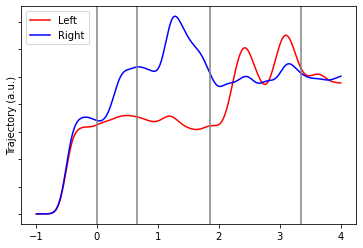

In [107]:
#Equation
diff_cd = (-np.array(l)+np.array(r))

#Calculating for late Delay(last 0.6 sec) and early Go(First 0.6 sec) epochs
delay_avg_diff = diff_cd[:,Str_delay:Stp_delay+1].mean(axis=1)
response_avg_diff = diff_cd[:,Str_go:Stp_go+1].mean(axis=1)

#Projection of left and right FR vector onto CD vector
newly_l = np.array(l).T.dot(delay_avg_diff)
newly_r = np.array(r).T.dot(delay_avg_diff)


fig, axs = plt.subplots(1, 1, sharex="all")
axs.plot(edges,newly_l,c='r')
axs.plot(edges,newly_r,c='b')

# Add vertical lines at specific x-axis positions for epoch plotting
axs.axvline(0, color=[0.5, 0.5, 0.5])
axs.axvline(0.65, color=[0.5, 0.5, 0.5])
axs.axvline(1.85, color=[0.5, 0.5, 0.5])
axs.axvline(3.35, color=[0.5, 0.5, 0.5])

# axs.text(0.1,-3000,'Sample',rotation=90)
# axs.text(0.75,-3000,'Delay',rotation=90)
# axs.text(1.95,-3000,'Go',rotation=90)
# axs.text(-0.4,-3000,'Pre-Sample',rotation=90)
axs.set_ylabel("Trajectory (a.u.)")
axs.set_xlabel("Time (sec)")
axs.tick_params(labelleft = False)
axs.legend(['Left','Right'])
plt.show()

In [108]:
data_l = pd.DataFrame(l).T
X_meaned = data_l - np.mean(data_l , axis = 0)

cov_mat = np.cov(X_meaned , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 5
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [109]:
eig_vals_total = sum(eigen_values)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalue]
explained_variance[:5]

[66.60708963574548,
 19.31614239363917,
 6.499957913578382,
 2.2214041516136556,
 1.9716598934453469]

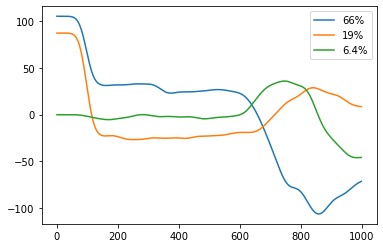

In [112]:
%matplotlib inline
plt.plot(X_reduced.T[0])
plt.plot(X_reduced.T[1])
plt.plot(X_reduced.T[2])
plt.legend(["66%", "19%", "6.4%"])

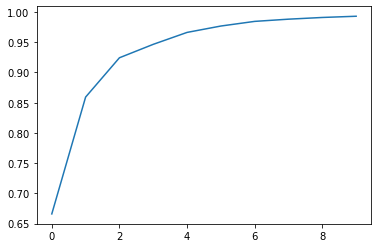

In [110]:
plt.plot((sorted_eigenvalue/sorted_eigenvalue.sum()).cumsum()[:10])

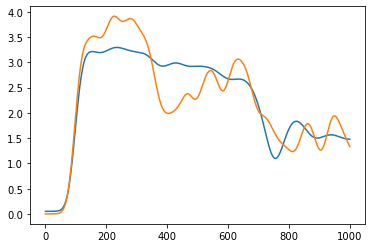

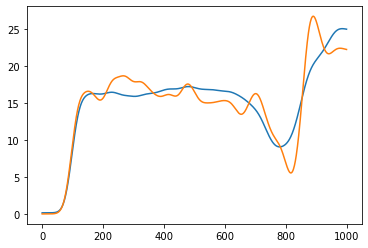

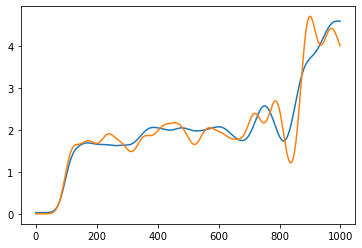

In [111]:
recon = X_reduced.dot(eigenvector_subset.T) #+ np.mean(data_st_l , axis = 0)
for i in range(3):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(recon.T[i] + np.mean(data_l , axis = 0)[i])
    plt.plot(l[i])
    plt.legend(['Reconstructed','Original'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Rate (Hz)')
    plt.show()

# Single Trial Projections

In [113]:
#Queries
trials_Data = trials_df_ag.query("photostim_onset == 'N/A' and outcome == 'hit' ")
units_Data = units_df_ag.query("Region == 'left Thalamus' and classification == 'good'")
trials_Data = trials_Data.query(" (delay_stop - delay_start) > 1 and (delay_stop - delay_start) < 1.3")
trials_Data = trials_Data.query(" (stop_time - start_time) < 5.3")

trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left']
trials_Data_R = trials_Data[ trials_Data['trial_instruction'] == 'right']

trials_Data_L = trials_Data_L.reset_index().head(1)
trials_Data_L

,id,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
0,9,58.4139,63.2594,N/A,1,left,no early,hit,1,58.9139,58.9239,58.9239,60.313,60.313,61.513,61.513,61.563


- ### Aligning spike time into trials

In [114]:
after = 4.3
before = -0.7
spike_data_l = []
trial_spikes_l_agg = []
temp_data_l = trials_Data_L
temp_unit = units_Data.query("ses_no == 1")

for unit in temp_unit.reset_index()['index']:
    unit_spike_times = temp_unit["spike_times"][unit]
    trial_spikes_l = []
    i = 0
    for time in temp_data_l['sample_start']:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        aligned_spikes = aligned_spikes[aligned_spikes < after ]
        aligned_spikes = aligned_spikes[before < aligned_spikes]
        trial_spikes_l.append(aligned_spikes)

        frq_l,edges,smooth_l = return_smooth_gauss(trial_spikes_l,0.1,temp_data_l)    
        spike_data_l.append(smooth_l)
        
        hist, edges = np.histogram(np.hstack(trial_spikes_l), bins=(np.arange(data_points + 1)*bin_size - 1))
        freq = (hist)
        trial_spikes_l_agg.append(freq)

In [115]:
data_l = pd.DataFrame(spike_data_l).T
X_meaned = data_l - np.mean(data_l , axis = 0)

cov_mat = np.cov(X_meaned , rowvar = False)

eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 6
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [116]:
eig_vals_total = sum(eigen_values)
explained_variance = [(i / eig_vals_total)*100 for i in sorted_eigenvalue]
explained_variance[:5]

[27.93051111708772,
 13.643933794250044,
 11.785326600618276,
 8.638708189064163,
 6.605539957941947]

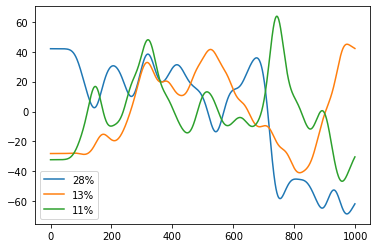

In [117]:
%matplotlib inline
plt.plot(X_reduced.T[0])
plt.plot(X_reduced.T[1])
plt.plot(X_reduced.T[2])
plt.legend(["28%", "13%", "11%"])

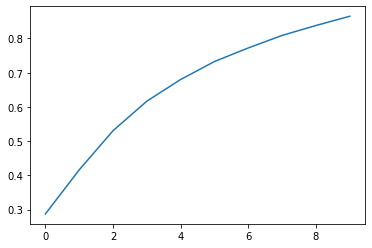

In [46]:
plt.plot((sorted_eigenvalue/sorted_eigenvalue.sum()).cumsum()[:10])

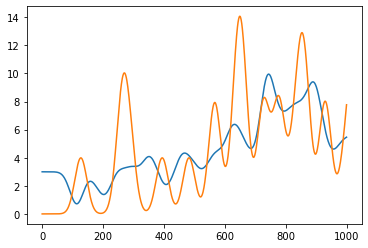

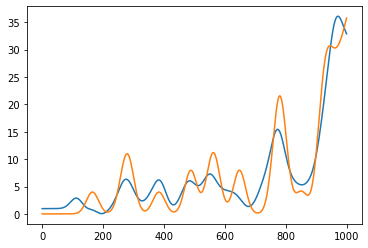

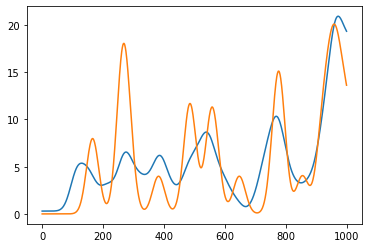

In [47]:
recon = X_reduced.dot(eigenvector_subset.T) #+ np.mean(data_st_l , axis = 0)
for i in range(3):
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(recon.T[i] + np.mean(data_l , axis = 0)[i])
    plt.plot(spike_data_l[i])
    plt.legend(['Reconstructed','Original'])
    plt.xlabel('Time (sec)')
    plt.ylabel('Rate (Hz)')
    plt.show()

In [48]:
trials_Data_L = trials_Data[ trials_Data['trial_instruction'] == 'left'].reset_index().query(" ses_no == 1 ")
trials_Data_L

,id,start_time,stop_time,photostim_onset,task_protocol,trial_instruction,early_lick,outcome,ses_no,pre_start,pre_stop,sample_start,sample_stop,delay_start,delay_stop,go_start,go_stop
0,9,58.4139,63.2594,N/A,1,left,no early,hit,1,58.9139,58.9239,58.9239,60.3130,60.3130,61.5130,61.5130,61.5630
1,10,65.1150,70.2301,N/A,1,left,no early,hit,1,65.6150,65.6250,65.6250,67.1732,67.1732,68.3732,68.3732,68.4232
2,12,79.1054,84.0787,N/A,1,left,no early,hit,1,79.6054,79.6154,79.6154,81.1465,81.1465,82.3465,82.3465,82.3965
3,21,134.5271,139.4989,N/A,1,left,no early,hit,1,135.0271,135.0371,135.0371,136.5096,136.5096,137.7096,137.7096,137.7596
4,22,141.3252,146.2507,N/A,1,left,no early,hit,1,141.8252,141.8352,141.8352,143.3449,143.3449,144.5449,144.5449,144.5949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,402,2670.8524,2675.7538,N/A,1,left,no early,hit,1,2671.3524,2671.3624,2671.3624,2672.8169,2672.8169,2674.0169,2674.0169,2674.0669
97,406,2698.8187,2703.6468,N/A,1,left,no early,hit,1,2699.3187,2699.3287,2699.3287,2700.7052,2700.7052,2701.9052,2701.9052,2701.9552
98,407,2705.8569,2710.6820,N/A,1,left,no early,hit,1,2706.3569,2706.3669,2706.3669,2707.7089,2707.7089,2708.9089,2708.9089,2708.9589
99,408,2712.8911,2717.6641,N/A,1,left,no early,hit,1,2713.3911,2713.4011,2713.4011,2714.8004,2714.8004,2716.0004,2716.0004,2716.0504


# CCG (SKIP from here*) (Initial Try to implement CCG, but didn't get the result)

In [49]:
import pickle

units_Data = units_df_ag.query("Region == 'left Thalamus' and classification == 'good'")

# after = 4.3
# before = -0.7

# All_trial_spike = []
# temp_data_l = trials_Data_L
# temp_unit = units_Data.query("ses_no == 1")

# for unit in temp_unit.reset_index()['index']:
#     unit_spike_times = temp_unit["spike_times"][unit]
#     trial_spikes_l = []
#     spike_data_l = []
#     i = 0
#     trial_spikes_l_agg = []
#     for time in temp_data_l['sample_start']:
#         # Compute spike times relative to stimulus onset
#         aligned_spikes = unit_spike_times - time
#         # Keep only spike times in a given time window around the stimulus onset
#         aligned_spikes = aligned_spikes[aligned_spikes < after ]
#         aligned_spikes = aligned_spikes[before < aligned_spikes]
#         trial_spikes_l.append(aligned_spikes)

# #         frq_l,edges,smooth_l = return_smooth_gauss(trial_spikes_l,0.1,temp_data_l)    
# #         spike_data_l.append(smooth_l)
        
#         hist, edges = np.histogram(np.hstack(trial_spikes_l), bins=(np.arange(1001)/200) - 1)
#         freq = (hist)
#         trial_spikes_l_agg.append(freq)
#     All_trial_spike.append(trial_spikes_l_agg)

# with open('440959_all_trialInfo_ll.pkl', 'wb') as f:
#     pickle.dump(All_trial_spike, f)
    
with open('440959_all_trialInfo_ll.pkl', 'rb') as f:
    All_trial_spike = pickle.load(f)

In [50]:
units_Data = units_df_ag.query("Region == 'left ALM' and classification == 'good'")

# after = 4.3
# before = -0.7
# All_trial_spike_alm = []
# temp_data_l = trials_Data_L
# temp_unit = units_Data.query("ses_no == 1")
# for unit in temp_unit.reset_index()['index']:
#     unit_spike_times = temp_unit["spike_times"][unit]
#     trial_spikes_l = []
#     i = 0
#     spike_data_lalm = []
#     trial_spikes_l_agg_alm = []
    
#     for time in temp_data_l['sample_start']:
#         # Compute spike times relative to stimulus onset
#         aligned_spikes = unit_spike_times - time
#         # Keep only spike times in a given time window around the stimulus onset
#         aligned_spikes = aligned_spikes[aligned_spikes < after ]
#         aligned_spikes = aligned_spikes[before < aligned_spikes]
#         trial_spikes_l.append(aligned_spikes)

# #         frq_l,edges,smooth_l = return_smooth_gauss(trial_spikes_l,0.1,temp_data_l)    
# #         spike_data_lalm.append(smooth_l)
        
#         hist, edges = np.histogram(np.hstack(trial_spikes_l), bins=(np.arange(1001)/200) - 1)
#         freq = (hist)
#         trial_spikes_l_agg_alm.append(freq)
        
#     All_trial_spike_alm.append(trial_spikes_l_agg_alm)

# with open('440959_all_trialInfo_alm_ll.pkl', 'wb') as f:
#     pickle.dump(All_trial_spike_alm, f)

with open('440959_all_trialInfo_alm_ll.pkl', 'rb') as f:
    All_trial_spike_alm = pickle.load(f)

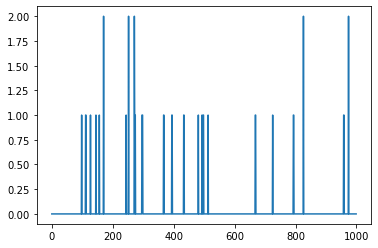

In [51]:
plt.plot(All_trial_spike_alm[0][5])

In [52]:
len(All_trial_spike_alm),len(All_trial_spike)

(39, 141)

In [53]:
n_t = np.shape(All_trial_spike_alm)[2]
# triangle function
tr = np.arange(-(n_t-1),(n_t-1))
theta = n_t-np.abs(tr)
tr[-1]

998

In [ ]:
#to do for every possible pair

CCGs = []
for i in range(len(All_trial_spike)):
    for k in range(len(All_trial_spike_alm)):
        CCG_F= []
        for j in range(len(All_trial_spike_alm[0])):
            CCG = []
            for n in range(999):
                CCG.append(All_trial_spike[i][j][(999 - n):].dot(All_trial_spike_alm[k][j][:n+1]))
            CCG.append(All_trial_spike[i][j].dot(All_trial_spike_alm[k][j]))
            for n in range(998):
                CCG.append(All_trial_spike[i][j][:(999-n)].dot(All_trial_spike_alm[k][j][n+1:]))
            CCG_F.append(CCG)
        CCGs.append(CCG_F)
    
with open('440959_allCCG_l.pkl', 'wb') as f:
    pickle.dump(CCGs, f)

# with open('440959_allCCG_l.pkl', 'rb') as f:
#     CCGs = pickle.load(f)

In [157]:
np.array(CCGs).shape

(141, 101, 1998)

In [207]:
CCG_r = np.sum(CCGs,axis=1)
time = np.arange(-4995,4995,5)
CCG_r.shape
#plt.plot(CCG[1] / (len(All_trial_spike[0]) *theta* np.sqrt(np.mean(All_trial_spike_alm[1])*np.mean(All_trial_spike[1]))))

(141, 1998)

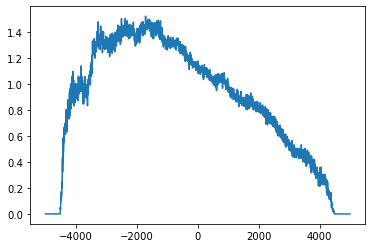

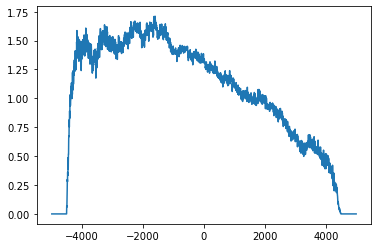

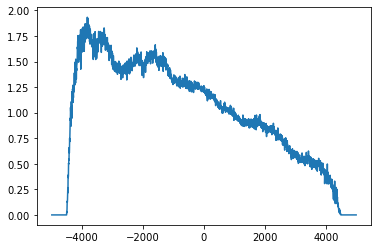

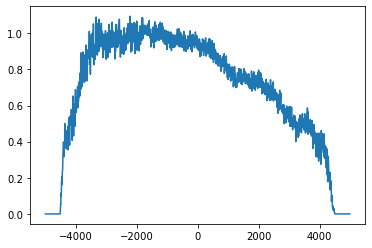

In [170]:
for i in range(len(CCG[:4])):
    pltCCG = 0
    pltCCG = CCG[i] / (len(All_trial_spike[0]) *theta* np.sqrt(np.mean(All_trial_spike_alm[0])*np.mean(All_trial_spike[i])))
    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(time,pltCCG)

# Jitter window 25ms 

In [235]:
import random
temp_trial_spike_25 = np.zeros((50, 3, 101, 1000))  #(,,,)

for t in range(temp_trial_spike_25.shape[0]):
    for k in range(temp_trial_spike_25.shape[1]):
        for j in range(temp_trial_spike_25.shape[2]):
            for i in range(200):
                temp_sum = All_trial_spike[k][j][(i*5):(i*5)+5].sum()
                if(temp_sum != 0):
                    for m in range(temp_sum):
                        loc_trial, loc_spike = random.randint(0,100),random.randint((i*5),(i*5)+4)
                        temp_trial_spike_25[t][k][loc_trial][loc_spike] += 1
 

In [236]:
temp_trial_spike_alm_25 = np.zeros((50, 1, 101, 1000))

for t in range(temp_trial_spike_alm_25.shape[0]):
    for k in range(temp_trial_spike_alm_25.shape[1]):
        for j in range(temp_trial_spike_alm_25.shape[2]):
            for i in range(40):
                temp_sum = All_trial_spike_alm[k][j][(i*25):(i*25)+25].sum()
                if(temp_sum != 0):
                    for m in range(temp_sum):
                        loc_trial, loc_spike = random.randint(0,100),random.randint((i*25),(i*25)+24)
                        temp_trial_spike_alm_25[t][k][loc_trial][loc_spike] += 1

In [144]:
# with open('440959_allCCG_l_resample.pkl', 'wb') as f:
#     pickle.dump(temp_trial_spike, f)
# with open('440959_allCCG_l_resample_alm.pkl', 'wb') as f:
#     pickle.dump(temp_trial_spike_alm, f)

In [237]:
temp_trial_spike_25 = temp_trial_spike_25.mean(axis=0)
temp_trial_spike_alm_25 = temp_trial_spike_alm_25.mean(axis=0)

# Jitter window 50ms

In [241]:
temp_trial_spike50 = np.zeros((50, 3, 101, 1000))  #(,,,)

for t in range(temp_trial_spike50.shape[0]):
    for k in range(temp_trial_spike50.shape[1]):
        for j in range(temp_trial_spike50.shape[2]):
            for i in range(100):
                temp_sum = All_trial_spike[k][j][(i*10):(i*10)+10].sum()
                if(temp_sum != 0):
                    for m in range(temp_sum):
                        loc_trial, loc_spike = random.randint(0,100),random.randint((i*10),(i*10)+9)
                        temp_trial_spike50[t][k][loc_trial][loc_spike] += 1

temp_trial_spike_alm50 = np.zeros((50, 1, 101, 1000))

for t in range(temp_trial_spike_alm50.shape[0]):
    for k in range(temp_trial_spike_alm50.shape[1]):
        for j in range(temp_trial_spike_alm50.shape[2]):
            for i in range(100):
                temp_sum = All_trial_spike_alm[k][j][(i*10):(i*10)+10].sum()
                if(temp_sum != 0):
                    for m in range(temp_sum):
                        loc_trial, loc_spike = random.randint(0,100),random.randint((i*10),(i*10)+9)
                        temp_trial_spike_alm50[t][k][loc_trial][loc_spike] += 1

In [242]:
temp_trial_spike50 = temp_trial_spike50.mean(axis=0)
temp_trial_spike_alm50 = temp_trial_spike_alm50.mean(axis=0)
# print(temp_trial_spike50.shape)

In [243]:
CCGs1_50 = []
for i in range(len(temp_trial_spike50)):
    for k in range(1):
        CCG_F1= []
        for j in range(len(temp_trial_spike_alm50[0])):
            CCG = []
            for n in range(999):
                CCG.append(temp_trial_spike50[i][j][(999 - n):].dot(temp_trial_spike_alm50[k][j][:n+1]))
            CCG.append(temp_trial_spike50[i][j].dot(temp_trial_spike_alm50[k][j]))
            for n in range(998):
                CCG.append(temp_trial_spike50[i][j][:(999-n)].dot(temp_trial_spike_alm50[k][j][n+1:]))
            CCG_F1.append(CCG)
        CCGs1_50.append(CCG_F1)

In [244]:
CCG1_50 = np.sum(CCGs1_50,axis=1)
CCG1_50.shape

(3, 1998)

# 1000ms

In [246]:
temp_trial_spike1000 = np.zeros((50, 3, 101, 1000))  #(,,,)

for t in range(temp_trial_spike1000.shape[0]):
    for k in range(temp_trial_spike1000.shape[1]):
        for j in range(temp_trial_spike1000.shape[2]):
            for i in range(5):
                temp_sum = All_trial_spike[k][j][(i*200):(i*200)+200].sum()
                if(temp_sum != 0):
                    for m in range(temp_sum):
                        loc_trial, loc_spike = random.randint(0,100),random.randint((i*200),(i*200)+199)
                        temp_trial_spike1000[t][k][loc_trial][loc_spike] += 1

temp_trial_spike_alm1000 = np.zeros((50, 1, 101, 1000))

for t in range(temp_trial_spike_alm1000.shape[0]):
    for k in range(temp_trial_spike_alm1000.shape[1]):
        for j in range(temp_trial_spike_alm1000.shape[2]):
            for i in range(5):
                temp_sum = All_trial_spike_alm[k][j][(i*200):(i*200)+200].sum()
                if(temp_sum != 0):
                    for m in range(temp_sum):
                        loc_trial, loc_spike = random.randint(0,100),random.randint((i*200),(i*200)+199)
                        temp_trial_spike_alm1000[t][k][loc_trial][loc_spike] += 1

In [247]:
temp_trial_spike1000 = temp_trial_spike1000.mean(axis=0)
temp_trial_spike_alm1000 = temp_trial_spike_alm1000.mean(axis=0)

In [248]:
CCGs1_1000 = []
for i in range(len(temp_trial_spike1000)):
    for k in range(1):
        CCG_F1= []
        for j in range(len(temp_trial_spike_alm1000[0])):
            CCG = []
            for n in range(999):
                CCG.append(temp_trial_spike1000[i][j][(999 - n):].dot(temp_trial_spike_alm1000[k][j][:n+1]))
            CCG.append(temp_trial_spike1000[i][j].dot(temp_trial_spike_alm1000[k][j]))
            for n in range(998):
                CCG.append(temp_trial_spike1000[i][j][:(999-n)].dot(temp_trial_spike_alm1000[k][j][n+1:]))
            CCG_F1.append(CCG)
        CCGs1_1000.append(CCG_F1)

In [249]:
CCG1_1000 = np.sum(CCGs1_1000,axis=1)
CCG1_1000.shape

(3, 1998)

In [250]:
#for 25ms CCG
CCGs1_25 = []
for i in range(len(temp_trial_spike_25)):
    for k in range(1):
        CCG_F1= []
        for j in range(len(temp_trial_spike_alm_25[0])):
            CCG = []
            for n in range(999):
                CCG.append(temp_trial_spike_25[i][j][(999 - n):].dot(temp_trial_spike_alm_25[k][j][:n+1]))
            CCG.append(temp_trial_spike_25[i][j].dot(temp_trial_spike_alm_25[k][j]))
            for n in range(998):
                CCG.append(temp_trial_spike_25[i][j][:(999-n)].dot(temp_trial_spike_alm_25[k][j][n+1:]))
            CCG_F1.append(CCG)
        CCGs1_25.append(CCG_F1)

In [251]:
CCG1_25 = np.sum(CCGs1_25,axis=1)
CCG1_25.shape

(3, 1998)

# CCG plots

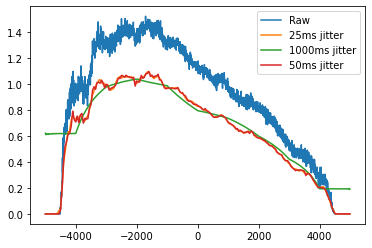

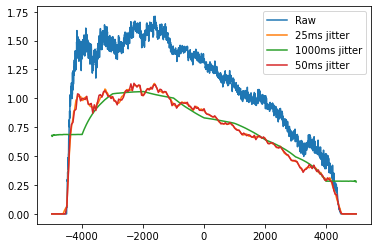

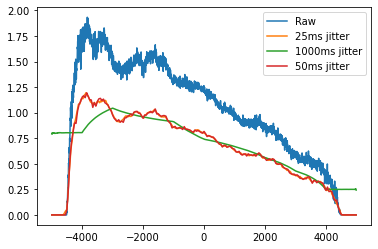

In [254]:
for i in range(len(CCG1[:3])):
    CCG_raw = CCG_r[i] / (len(All_trial_spike[0]) *theta* np.sqrt(np.mean(All_trial_spike_alm[0])*np.mean(All_trial_spike[i])))
    CCG_jitter_25 = CCG1_25[i] / (len(temp_trial_spike_25[0]) *theta* np.sqrt(np.mean(temp_trial_spike_alm_25[0])*np.mean(temp_trial_spike_25[i])))
    #CCG_jitter_10 = CCG1_10[i] / (len(temp_trial_spike10[0]) *theta* np.sqrt(np.mean(temp_trial_spike_alm10[0])*np.mean(temp_trial_spike10[i])))
    CCG_jitter_50 = CCG1_50[i] / (len(temp_trial_spike50[0]) *theta* np.sqrt(np.mean(temp_trial_spike_alm50[0])*np.mean(temp_trial_spike50[i])))
    CCG_jitter_1000 = CCG1_1000[i] / (len(temp_trial_spike1000[0]) *theta* np.sqrt(np.mean(temp_trial_spike_alm1000[0])*np.mean(temp_trial_spike1000[i])))

    fig, axs = plt.subplots(1, 1, sharex="all")
    plt.plot(time,CCG_raw)
    plt.plot(time,CCG_jitter_25)
    plt.plot(time,CCG_jitter_1000)
#     plt.plot(time,CCG_jitter_10,'--')
    plt.plot(time,CCG_jitter_50)
    plt.legend(['Raw','25ms jitter','1000ms jitter','50ms jitter'])

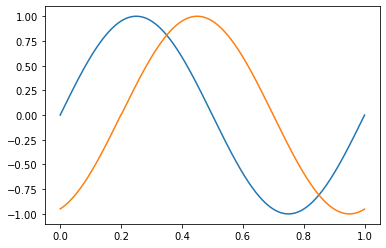

In [57]:
t = np.linspace(0,1,1000)
signal = np.sin(2*np.pi*t)
shift = np.roll(signal,200)
plt.plot(t,signal)
plt.plot(t,shift)
#count

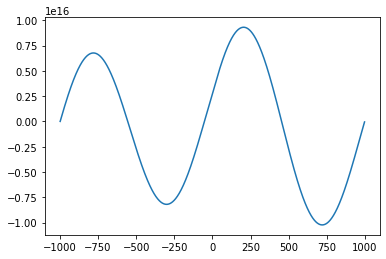

In [58]:
sf= []
for n in range(999):
    sf.append(signal[(999 - n):].dot(shift[:n+1]))
sf.append(signal.dot(shift))
for n in range(998):
    sf.append(signal[:(999-n)].dot(shift[n+1:]))
plt.plot(np.arange(1998)-999,sf/(theta*np.mean(signal)))

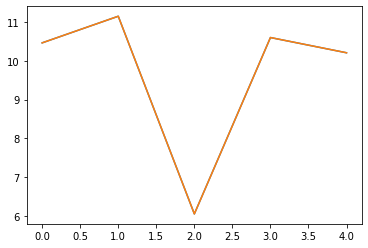

In [258]:
t = np.linspace(0,1,1000)
signal = np.random.normal(10,2,5)
#shift = np.roll(signal,50)
plt.plot(signal)
#plt.plot(shift)

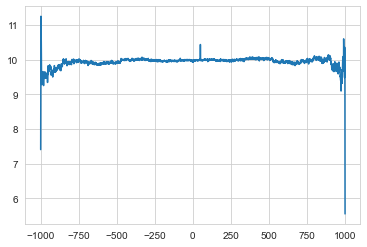

In [76]:
sf= []
for n in range(999):
    sf.append(signal[(999 - n):].dot(shift[:n+1]))
for n in range(999):
    sf.append(signal[:(999-n)].dot(shift[n+1:]))
plt.plot(np.arange(-999,999),sf/(theta*np.sqrt(np.mean(signal) * np.mean(shift))))

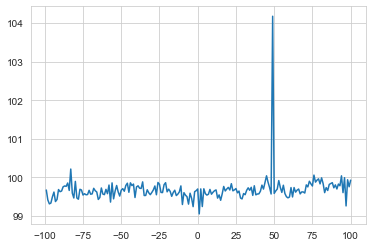

In [73]:
plt.plot(np.arange(-999,999)[900:1100],sf[900:1100]/(theta[900:1100]))

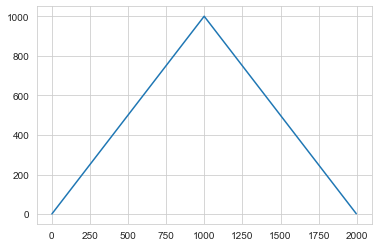

In [75]:
plt.plot(theta)